In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/TFG/textos_procesados_bien.csv'
df_procesado = pd.read_csv(path, usecols=['ODS', 'Texto', 'Tokens'])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import pickle 
import matplotlib.pyplot as plt


In [4]:
# Variables X e Y para entrenar y probar el algoritmo SVM 
# Training = 80%, test = 20%

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_procesado['Tokens'],df_procesado['ODS'],test_size=0.2, shuffle = True, random_state=0)

# TF-IDF
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df_procesado['Tokens'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
# Algoritmo SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=0, probability=True)
# Entrenamiento del algoritmo 
SVM.fit(Train_X_Tfidf,Train_Y)



Accuracy del modelo ->  54.59568056253139
Porcentaje de acierto para cada una de las clases: 
              precision    recall  f1-score   support

           1       0.37      0.23      0.29        69
           2       0.62      0.70      0.66        61
           3       0.64      0.82      0.72       277
           4       0.66      0.58      0.62       101
           5       0.74      0.84      0.79        90
           6       0.74      0.64      0.68        22
           7       0.48      0.66      0.56        62
           8       0.53      0.54      0.53       264
           9       0.48      0.39      0.43        77
          10       0.54      0.52      0.53       165
          11       0.51      0.29      0.37        68
          12       0.51      0.52      0.52       143
          13       0.54      0.52      0.53       147
          14       0.33      0.20      0.25        15
          15       1.00      0.10      0.18        10
          16       0.49      0.38      0.

<Figure size 432x288 with 0 Axes>

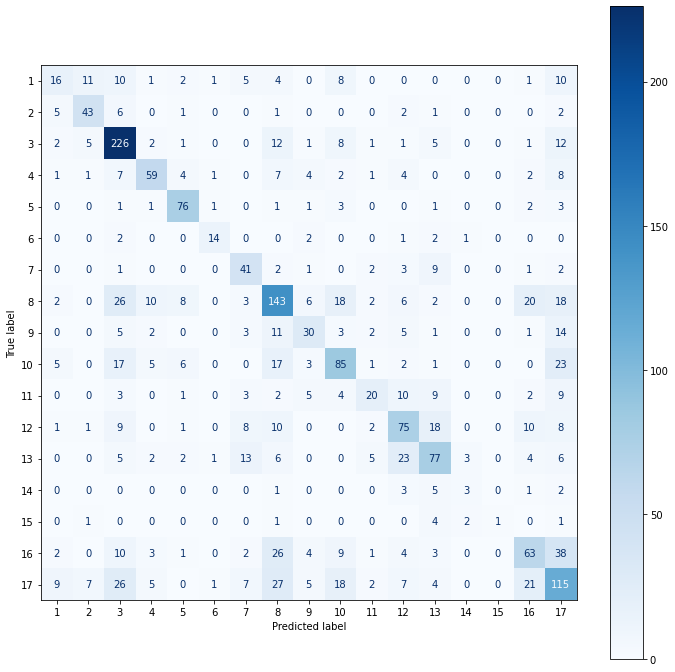

Matriz de confusion train: 


<Figure size 432x288 with 0 Axes>

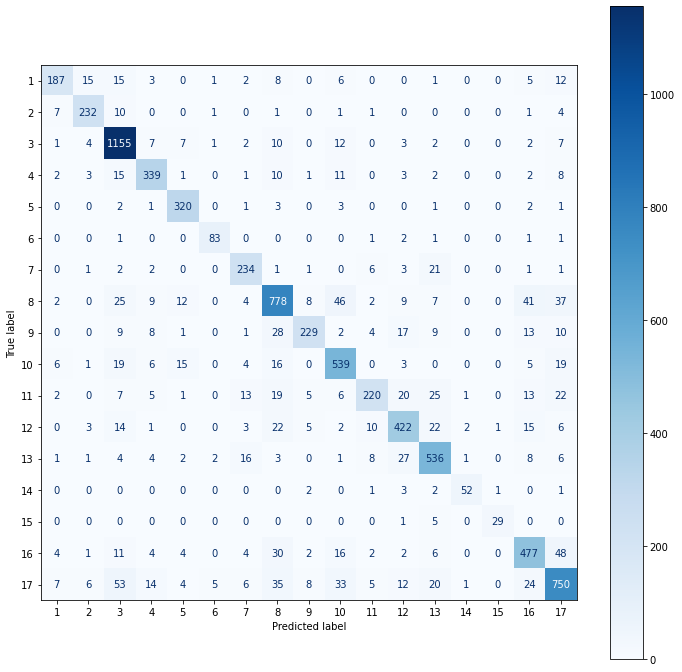

In [11]:
# Evaluacion del modelo 
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("Accuracy del modelo -> ",accuracy_score(predictions_SVM, Test_Y)*100)

print("Porcentaje de acierto para cada una de las clases: ")
print(classification_report(Test_Y, predictions_SVM))

print("Matriz de confusion test: ")
plt.clf()
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(SVM, Test_X_Tfidf, Test_Y, cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show() 

print("Matriz de confusion train: ")
plt.clf()
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(SVM, Train_X_Tfidf, Train_Y, cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show() 

filename = 'final_model.sav'
pickle.dump(SVM, open(filename, 'wb'))

filename2 = 'tfyidf_model.sav'
pickle.dump(Tfidf_vect, open(filename2, 'wb'))

In [18]:
# Algoritmo SVM utilizando cross-validation
from sklearn.model_selection import cross_val_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=0)
scores = cross_val_score(SVM, Test_X_Tfidf, Test_Y, cv=10)

for index, value in enumerate(scores):
  print(f"Accuracy del fold {index} -> {value:.2%}")

print(f" Accuracy medio: {scores.mean():.2%}, desviación estandar: {scores.std():.2%}")

Accuracy del fold 0 -> 49.00%
Accuracy del fold 1 -> 48.24%
Accuracy del fold 2 -> 55.28%
Accuracy del fold 3 -> 49.75%
Accuracy del fold 4 -> 47.74%
Accuracy del fold 5 -> 50.25%
Accuracy del fold 6 -> 50.75%
Accuracy del fold 7 -> 49.75%
Accuracy del fold 8 -> 50.25%
Accuracy del fold 9 -> 45.23%
 Accuracy medio: 49.62%, desviación estandar: 2.43%
